In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Punto 1

##A)

In [2]:
from sympy import *
init_printing(use_unicode=True, wrap_line=False, no_global=True)

La utilización de sympy en general, y en específico el uso de **.subs**, la creación de una lista de lista de símbolos con sub-índices y el uso de la función **sympify** las saqué de la página web de la documentación de Sympy que estaba en el link del enunciado de la tarea.

In [14]:
#Definir función de interpolación de Lagrange
def lagrange(N): #Función de interpolación de Lagrange.
    resultado = 0 #La sumatoria empieza en 0.
    for i in range(N): #Se itera hasta N-1.
        sub = str(i) #Se convierte la variable i a un string.
        fActual = var('f'+sub) #Se crea la función f para cada iteración.
        prod = 1 #Se inicializa la multiplicatoria en 1.
        for w in range(N): #Se itera hasta N-1.
            if(w != i): #Condición de la interpolación de Lagrange.
                W = str(w) #Convertir variable 
                tActual = sympify('t'+sub) #El t correspondiente a la función.
                tActual2 = sympify('t'+W) #Los otros t que dependen de la mutiplicatoria.
                prod = prod*(t-tActual2)/(tActual - tActual2) #Se actualiza la multiplicatoria.
        resultado += fActual*prod #Se actualiza la sumatoria.
    return resultado #Se retorna la sumatoria.

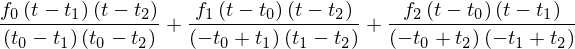

In [15]:
lagrange(3)

##B)

In [16]:
#Definir la función Adams
h=sympify('h') #Crear símbolo h.
def adams(m):
    losT = symbols('t:%d' %m) #Crear un arreglo de t's ordenadas por subíndices de 0 a m.
    igualdades = [] #Arreglo de relaciones de tn con los demás t.
    for i in range(len(losT)): #Llenar el arreglo con las igualdades de tn. 
        puntoActual = (losT[i], losT[0] - i*h)
        igualdades.append(puntoActual)
    polinomio = lagrange(m) #Crear el polinomio de interpolación de Lagrange de grado m.
    resultado = integrate(polinomio, (t, losT[0], losT[0] + h)) #Integrar.
    resultado = resultado.subs(igualdades) #Sustituir las igualdades expresadas antes.
    resultado = simplify(resultado) #Simplificar el resultado de la integración.
    return resultado

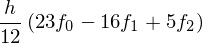

In [17]:
adams(3)

#Punto 2

##A)

Para la realización de este punto me guié con el contenido del notebook PDE.ipynb de Juan David, adaptando el método al caso del potencial gravitacional.

In [185]:
#Constantes necesarias y geometría
G = 6.67384*10**(-11)
L = 3000
NL = 101 #Cubo de 100, 50 hacia cada semieje.
xmin = -L/2 #Establecer límites y geometría.
xmax = L/2
ymin = -L/2
ymax = L/2
zmin = -L/2
zmax = L/2
xcoords = linspace(xmin, xmax, NL) #Los arreglos
ycoords = linspace(ymin, ymax, NL)
zcoords = linspace(zmin, zmax, NL)
xmesh, ymesh, zmesh= meshgrid(xcoords, ycoords, zcoords) #Ceación de cuadrícula.
dx = (xmax - xmin)/(NL-1) #Los diferenciales.
dy = (ymax - ymin)/(NL-1)
dz = (zmax - zmin)/(NL-1)

In [153]:
rango = [] #Las 10 casillas hacia cada lado que definen el cubo.
for i in range(10):
    actual = 45 + i
    rango.append(actual)

In [154]:
density = zeros((101,101,101)) #Crear el espacio vacío.
for i in rango: #Llenar el cubo con el valor dado.
    for j in rango:
        for k in rango:
            density[i][j][k]= 400

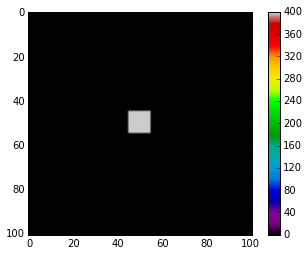

In [155]:
imshow(density[50], cmap = 'spectral') #Visualizar el cubo creado.
colorbar()

In [156]:
#Asignar el potencial de masa puntual como punto de partida.
campo = -G*400*270*3/np.sqrt(xmesh**2+ymesh**2+zmesh**2)
campo[50,50,50]=campo[50,50,49] #Evitar indeterminaciones

/Users/usuario/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from IPython.kernel.zmq import kernelapp as app


In [157]:
itera = 500 #Número de Iteraciones para el método de relajación.

In [158]:
for __ in range(itera): #Método de relajación.
    campo = (1/6)*(np.roll(campo,1,axis=0) +\
                    np.roll(campo,-1,axis=0)+\
                    np.roll(campo,1,axis=1) +\
                    np.roll(campo,-1,axis=1)+\
                    np.roll(campo,1,axis=2) +\
                    np.roll(campo,-1,axis=2) - 4*np.pi*G*(dx**2)*density)
    campo[0] = 0 #Condiciones de frontera en 3D.
    campo[-1] = 0
    campo[:,0] = 0
    campo[:,-1] = 0
    campo[:,:,0] = 0
    campo[:,:,-1] = 0

In [192]:
xmesh2, ymesh2 = meshgrid(xcoords, ycoords)

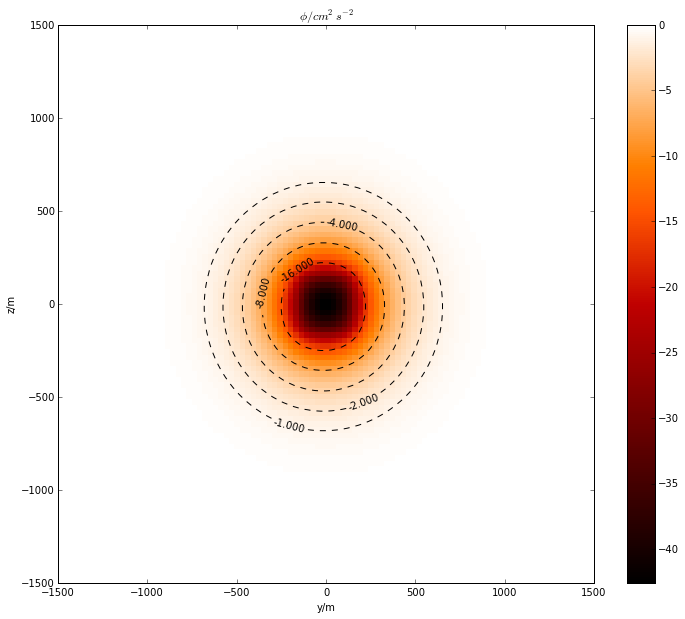

In [197]:
figure(figsize=(12,10)) #Se crea la figura.
graf1 = pcolor(xmesh2, ymesh2,10000*campo[50],cmap='gist_heat') #Se crea la gráfica de color.
graf2 = contour(xmesh2, ymesh2,10000*campo[50], [-16,-8,-4,-2,-1], colors = 'Black') #Se crean las líneas de contorno.
label = clabel(graf2, inline=1, fontsize=10) #Se crean los nombres de dichas líneas de contorno.
colorbar(graf1) #Mostrar la colorbar.
title("$\phi/cm^2 s^{-2}$")
xlabel("y/m")
ylabel("z/m")
savefig("Densidad.png")

##B)

Graficar potencial

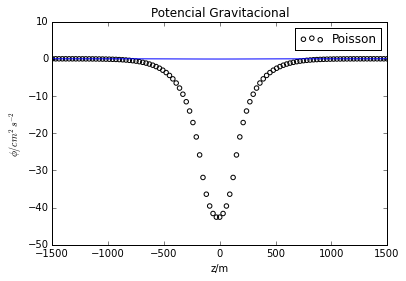

In [712]:
#Plotear los valores de potencial sobre el eje Z. Por simetría, el xmesh equivale a ver sobre Z.
scatter(xmesh[0,:],10000*campo[50][50], facecolors='none', edgecolors = "Black", label = "Poisson")
xlim(-1500,1500)
xlabel("z/m")
ylabel("$\phi/cm^2 s^{-2}$")
title("Potencial Gravitacional")
legend()

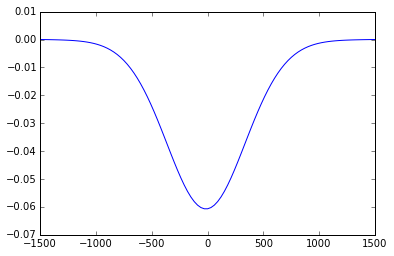

In [711]:
plot(xmesh[0,:], 10000*campo[25][25])

##C)

Graficar campo

In [194]:
#Los arreglos
potencial = 10000*campo[50][50]
ejeZ = xmesh2[0,:]

In [195]:
#Derivadas y demás
minimo = min(potencial)
maximo = max(potencial)
largo = len(potencial)
h = (maximo - minimo)/largo
forward = np.roll(potencial, -1)
backward = np.roll(potencial, 1)
dy = (forward-backward)/(2*h)
dy2 = dy[1:-1]
nuevoEje = ejeZ[1:-1]

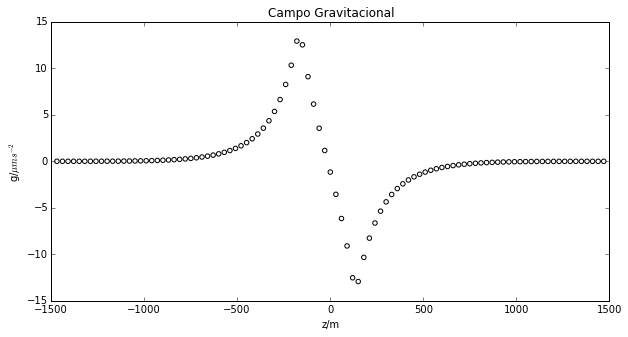

In [196]:
figure(figsize=(10,5))
scatter(nuevoEje, -dy2, facecolors='none', edgecolors='Black')
xlim(-1500,1500)
title("Campo Gravitacional")
xlabel("z/m")
ylabel("g/$\mu m s^{-2}$")
title("Campo Gravitacional")
#savefig("CampoGravitacional.png")

##D)

In [198]:
from scipy.interpolate import *

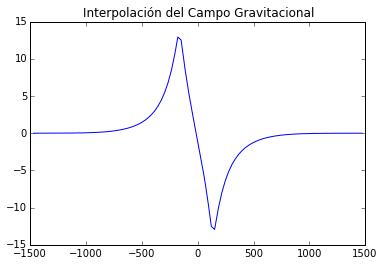

In [709]:
#Hallar condiciones iniciales.
#Z(0)=550
#U(0)=?
interp = interp1d(nuevoEje, -dy2)
r = linspace(min(nuevoEje),max(nuevoEje), 2940)
plot(r, interp(r))
title("Interpolación del Campo Gravitacional")

In [ ]:
#Adivinar tiempo requerido
